In [91]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
#Import and cleaning
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df = df[df['Country/Region']=='China'] #Nur China
df = df[df["Province/State"]!='Unknown'] #Nur das Total. "unknown" ist das Total
del df['Country/Region']
del df['Lat']
del df['Long']


In [93]:
#Daten drehen
df = df.transpose()
df = df.reset_index()


In [94]:
#Daten zum Index machen
df['date'] = pd.to_datetime(df['index'], format='%M/%d/%y', errors='ignore')
df = df.set_index('date')


In [95]:
#Provinznamen zum Titel machen
df.columns = df.iloc[0]
del df['Province/State']
df = df[1:]

<AxesSubplot:xlabel='date'>

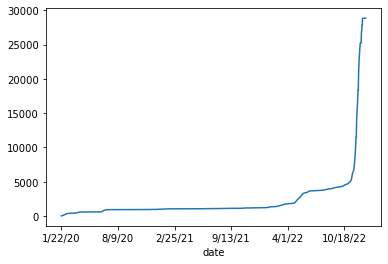

In [96]:
df['Beijing'].plot()

Text(0.5, 1.0, 'Beijing')

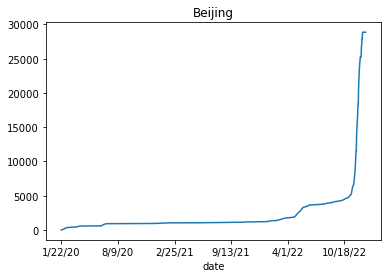

In [97]:
#Plotting Beijing
fig, ax = plt.subplots()
df['Beijing'].plot(ax=ax, legend=False)
ax.set_title("Beijing")

In [98]:
provinces = list(df.columns)

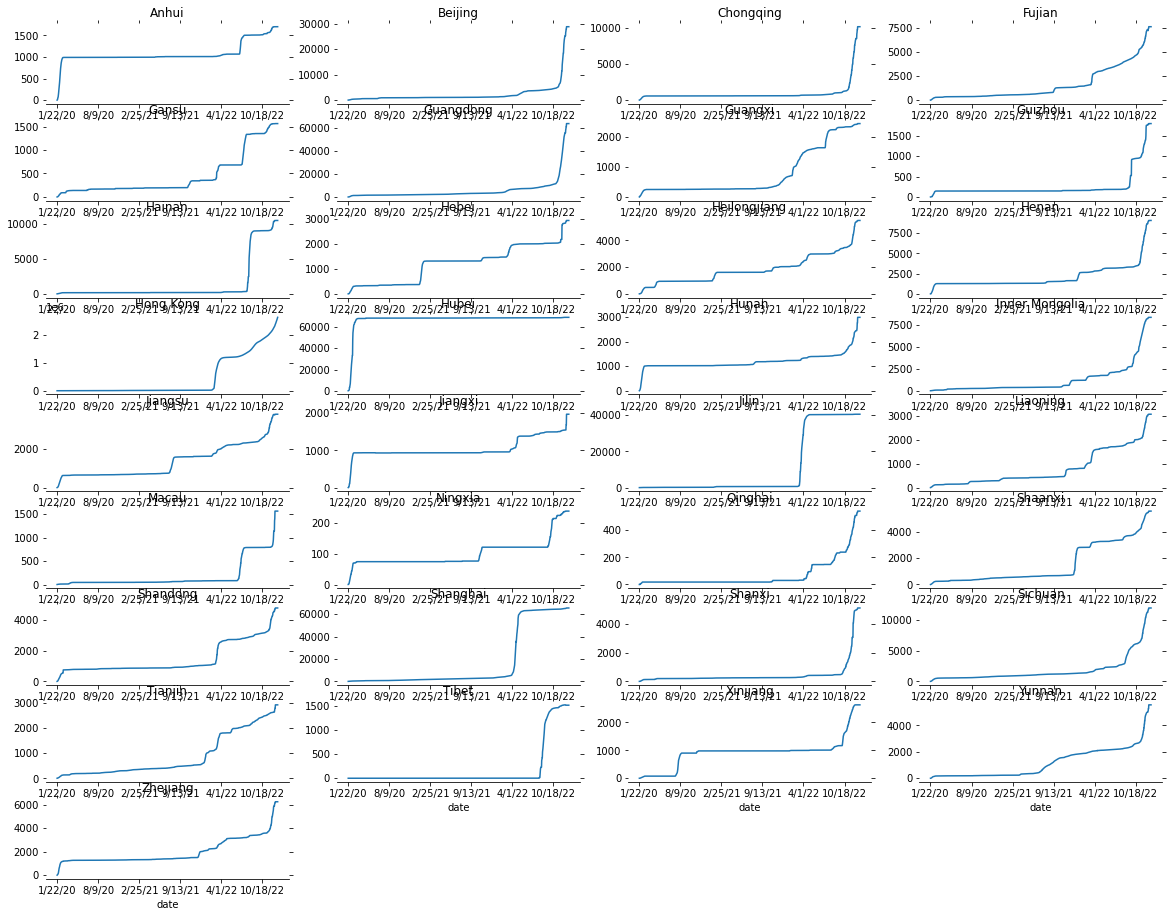

In [99]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=17, ncols=4, figsize=(20,30))
axes_list = [item for sublist in axes for item in sublist] 

for province in provinces:
    ax = axes_list.pop(0)
    df[province].plot(ax=ax,label=province, legend=False)
    ax.set_title(province)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()